In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
data = pd.HDFStore("train.h5", "r").get("train")

In [3]:
print ("data shape: ", data.shape)
print ('Number of Unique ids: ', data.id.unique().size)
print ('Number of Unique timestamps: ', data.timestamp.unique().size)

data shape:  (1710756, 111)
Number of Unique ids:  1424
Number of Unique timestamps:  1813


In [35]:
data.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,0.033375,-0.072108,0.249187,0.024401,-0.127942,0.014806,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,-0.005227,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,-0.000719,0.037680,-2.293301e-09,-0.000483,-2.0,-0.00033,0.000034,-2.0,-0.273957,0.0,-2.000000e+00,-2.0,-0.000058,0.001652,-2.0,0.0,-2.0,-0.0,0.652981,0.000000,-0.142453,0.0,0.00019,0.000376,1.427469,0.000239,-2.0,0.0,-0.000382,-4.730027e-14,0.000374,0.0,0.937880,0.775208,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.414776,0.000098,-0.0,-2.0,0.000011,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.096750,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,-0.017468,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,0.005917,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,-2.293301e-09,-0.000483,-2.0,-0.00033,0.000034,-2.0,-0.159432,0.0,0.000000e+00,-2.0,-0.000058,0.004317,0.0,0.0,-2.0,-0.0,-0.399520,0.000000,-0.309356,-0.5,0.00019,0.000376,0.154613,0.000239,0.0,0.0,-0.000382,-4.730027e-14,0.000374,0.5,0.232154,0.025590,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.273607,0.000098,-0.0,-2.0,0.000011,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,-0.040183,0.033375,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,-0.017468,0.172751,0.961091,1.028205,-0.165369,0.056006,-0.024560,0.249530,-0.156078,-0.022934,0.019192,0.053364,-0.020247,-0.012173,0.064028,-0.249106,-0.106216,-0.085509,0.383589,-0.005227,-0.074021,-0.054295,-0.746073,-0.0576

In [6]:
data.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.710756e+06,1.710756e+06,1.637797e+06,1.629727e+06,1.312105e+06,1.561285e+06,1.304298e+06,1.686809e+06,1.031686e+06,1.341916e+06,1.256376e+06,748736.000000,1.009131e+06,1.684416e+06,1.337590e+06,1.145189e+06,1.597779e+06,1.341916e+06,1.599885e+06,1.355618e+06,1.354672e+06,1.355859e+06,1.355618e+06,1.613534e+06,1.694923e+06,1.656168e+06,1.599885e+06,1.656423e+06,1.152268e+06,1.354033e+06,1.134101e+06,1.588862e+06,1.053572e+06,1.429458e+06,1.043425e+06,1.356650e+06,1.355849e+06,1.256376e+06,1.599084e+06,1.696921e+06,1.275894e+06,1.286280e+06,1.694913e+06,1.354913e+06,907267.000000,1.333182e+06,1.431054e+06,1.680641e+06,1.687843e+06,1.356225e+06,1.354951e+06,1.694694e+06,1.354913e+06,1.264428e+06,1.694913e+06,1.152423e+06,1.355525e+06,1.263703e+06,1.556829e+06,1.686809e+06,1.326543e+06,1.341916e+06,1.341916e+06,1.053572e+06,1.568631e+06,1.694694e+06,1.355630e+06,1.038955e+06,1.597779e+06,1.335142e+06,1.691591e+06,1.583980e+06,1.706477e+06,1.612462e+06,1.557152e+06,1.706477e+06,1.708520e+06,1.691591e+06,1.543273e+06,1.706477e+06,1.691591e+06,1.705992e+06,1.696572e+06,1.690775e+06,1.706477e+06,1.690740e+06,1.708436e+06,1.705992e+06,1.708520e+06,1.710756e+06,1.639610e+06,1.502700e+06,1.708336e+06,1.447840e+06,1.649141e+06,1.705992e+06,1.528078e+06,1.691591e+06,1.696221e+06,1.710756e+06,1.707601e+06,1.708204e+06,1.691591e+06,1.691591e+06,1.690740e+06,1.708520e+06,1.666567e+06,1.690755e+06,1.706070e+06,1.473977e+06,1.710756e+06
mean,1.093858e+03,9.456257e+02,-4.536046e+00,7.729436e+11,-3.320328e-01,-5.046012e-01,1.801661e+01,-2.040938e-02,-5.703754e+08,-1.622954e-01,2.780239e-02,0.775240,1.404761e-01,4.865615e+01,8.000651e-02,-8.617447e-02,4.418401e-01,-2.534907e-01,6.168341e+01,1.333553e-01,3.135854e+00,2.118761e-01,-2.115467e-01,7.087444e+13,-8.233162e-01,3.989280e-01,-1.480752e+00,9.907262e-02,6.140608e-02,2.740388e+01,7.610784e-02,1.693920e-01,2.169823e+02,4.224846e+00,4.284626e-02,5.558513e-01,6.634763e-02,9.953792e-02,3.315642e+01,6.165651e+02,1.918833e+00,3.489724e-01,2.671928e+01,1.483696e-01,0.049366,2.712474e-01,-1.211397e-02,-4.696748e+02,1.322136e+02,2.344497e-01,1.720977e+00,1.468040e+00,1.867855e-01,6.526184e-02,-6.305848e-02,3.434145e-01,1.257884e+01,3.249429e-01,3.440971e-01,-1.666229e-01,1.882488e-01,-8.485153e-02,4.631519e-02,2.221422e-01,2.167122e-02,1.480153e-01,1.942597e-01,9.340944e+11,-5.293713e-02,1.522306e-01,-1.092023e-01,4.753915e-04,-9.030412e-01,1.216685e-03,7.961914e-04,-9.516839e-01,5.059733e-02,-2.304117e-02,-7.

/home/thor/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


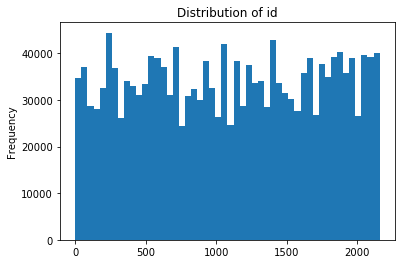

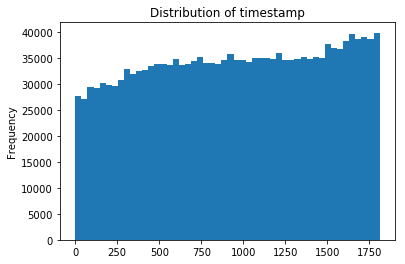

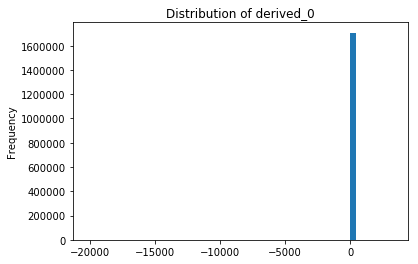

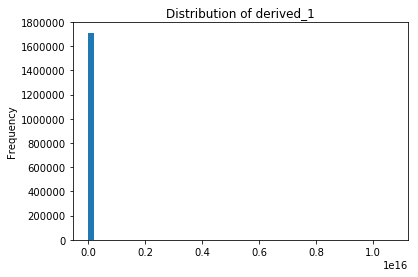

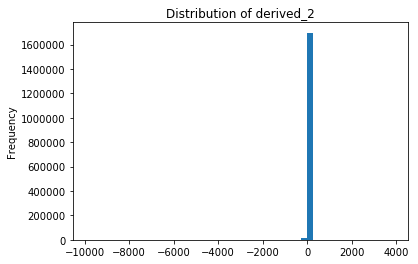

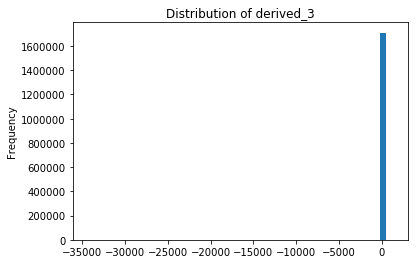

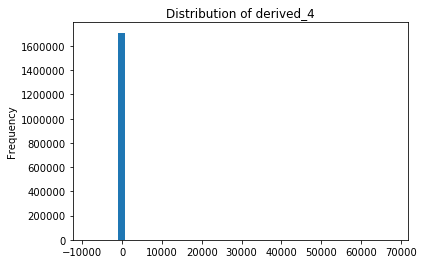

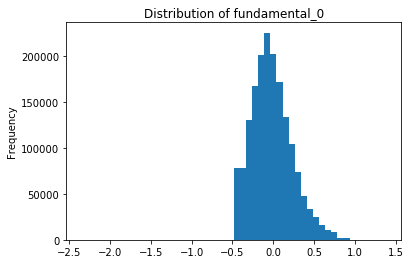

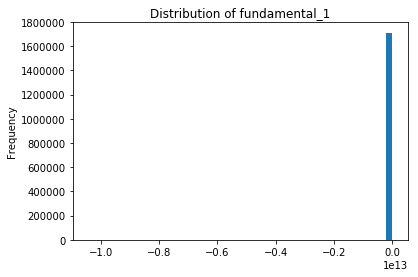

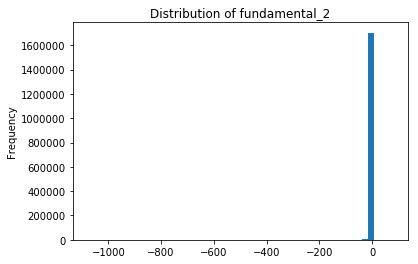

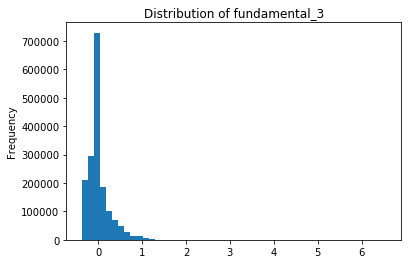

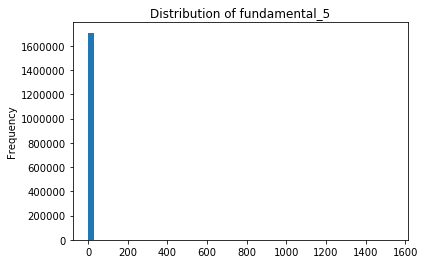

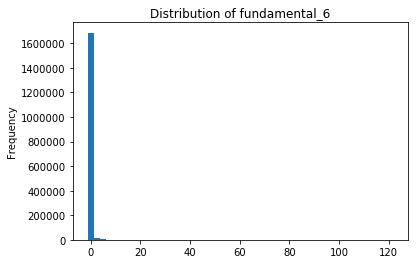

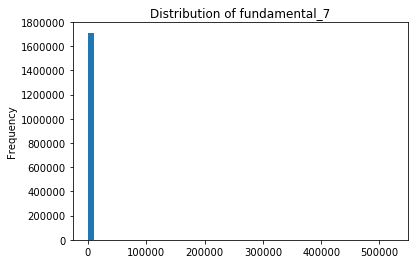

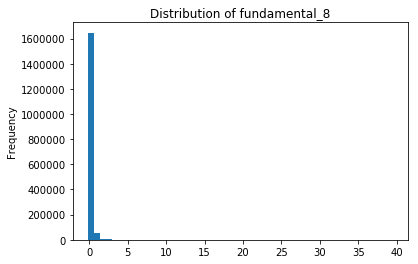

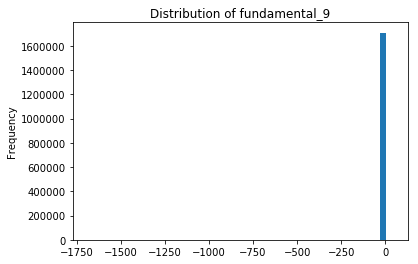

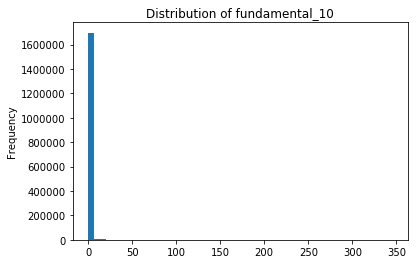

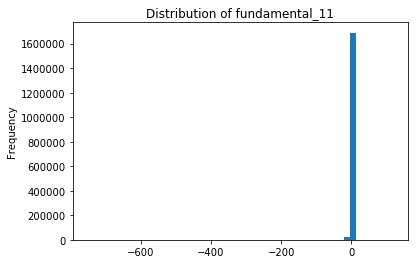

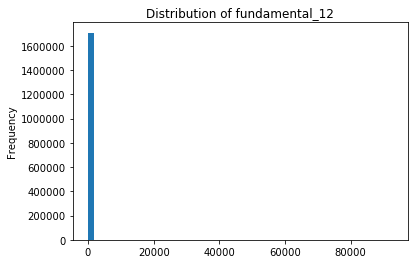

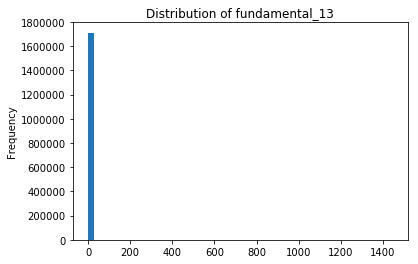

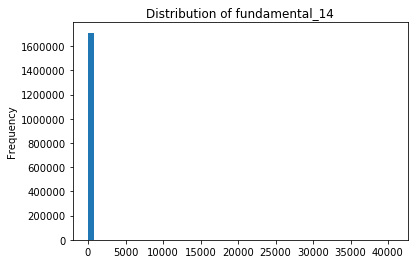

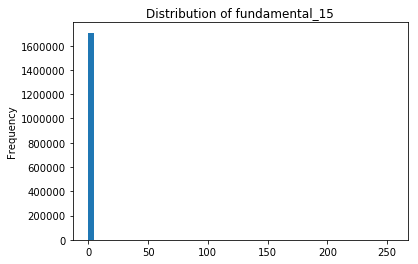

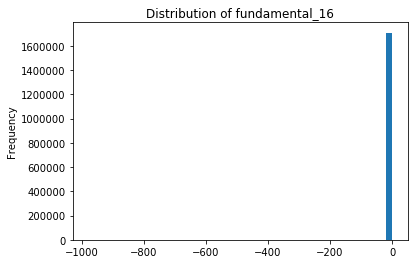

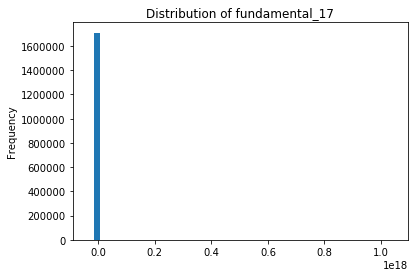

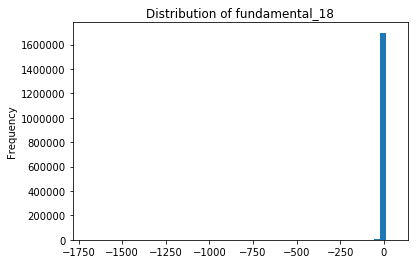

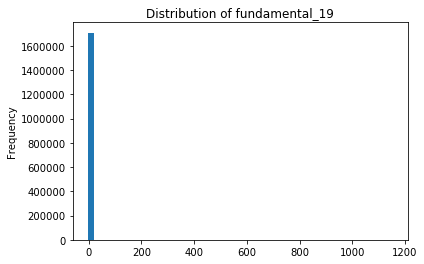

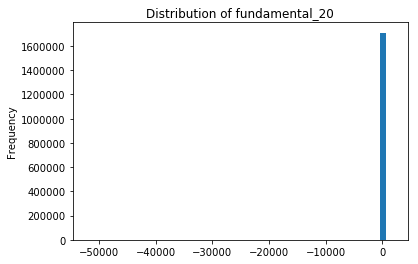

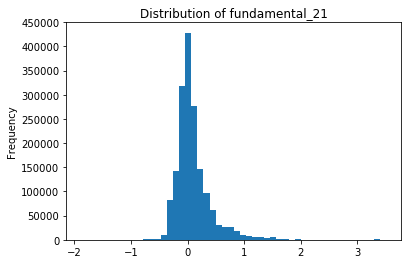

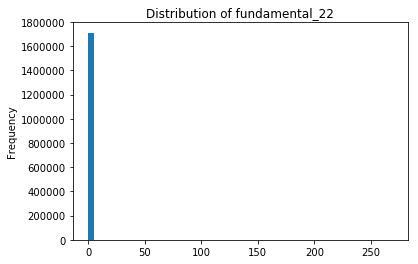

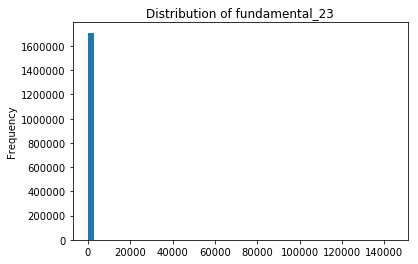

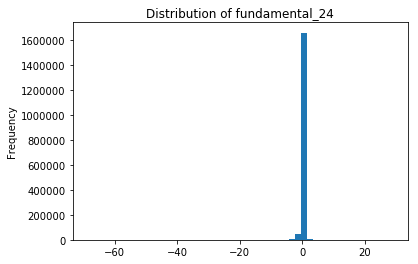

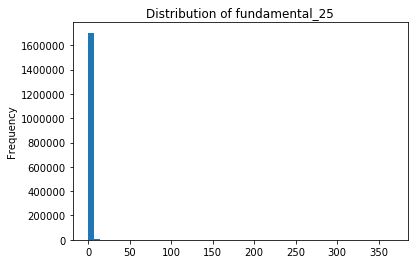

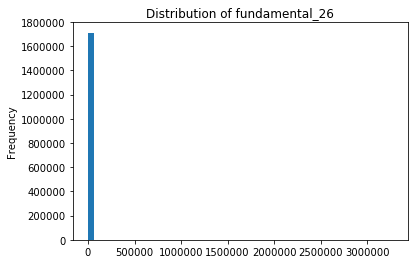

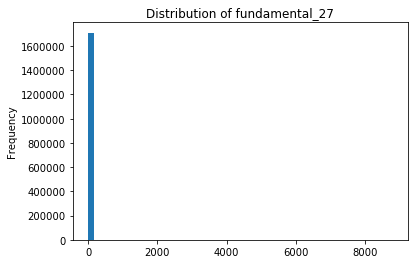

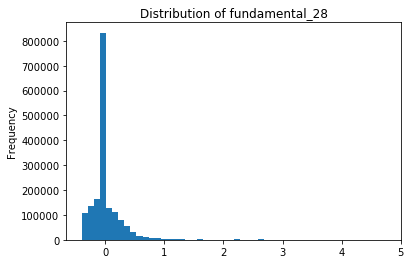

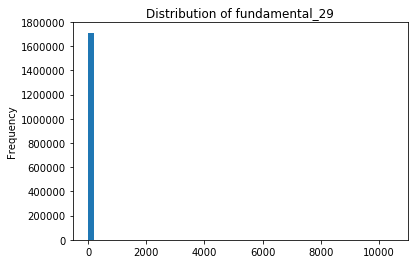

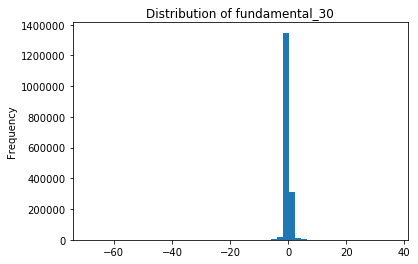

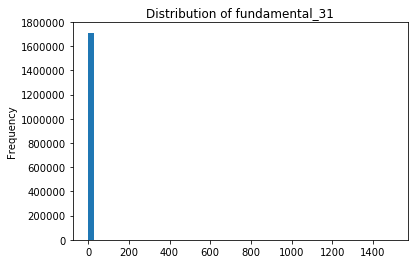

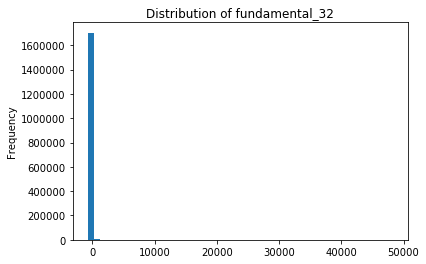

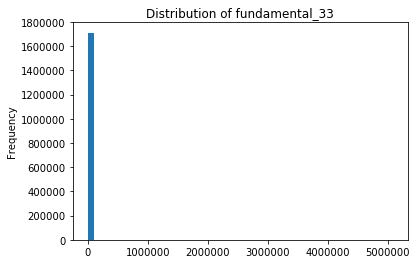

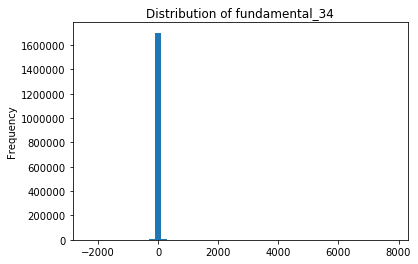

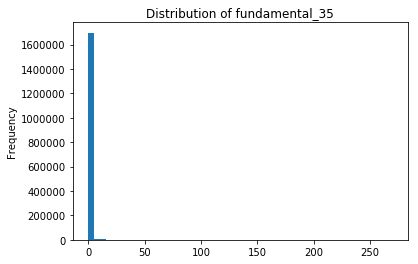

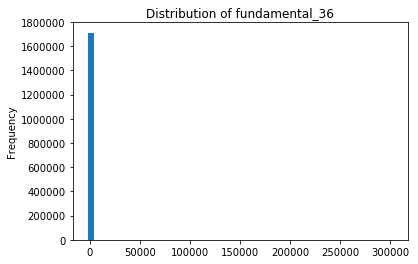

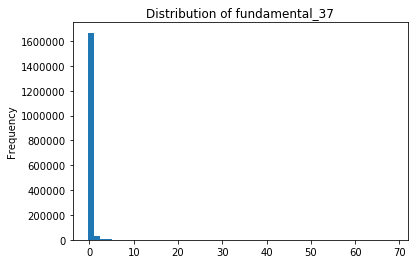

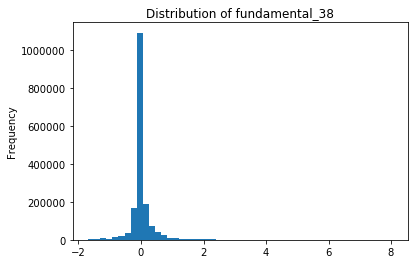

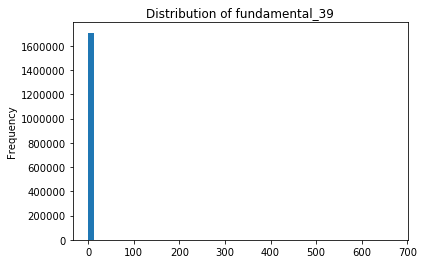

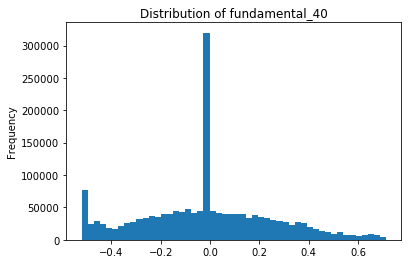

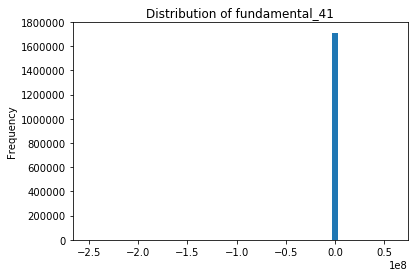

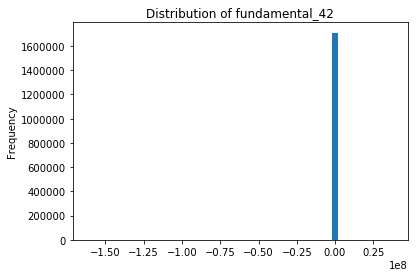

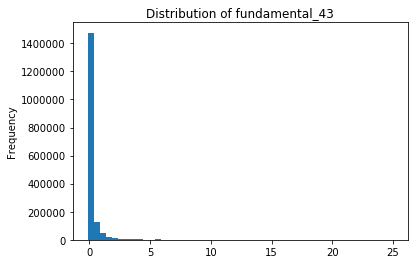

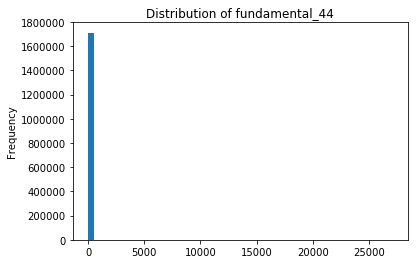

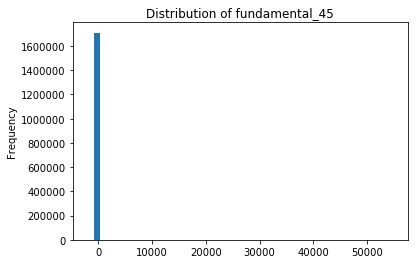

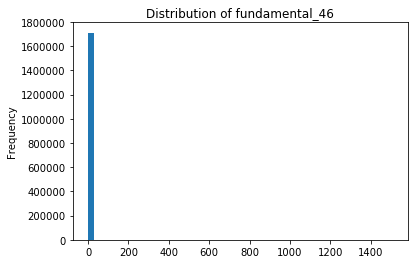

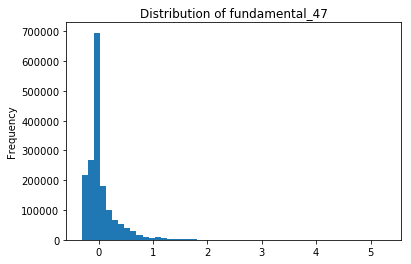

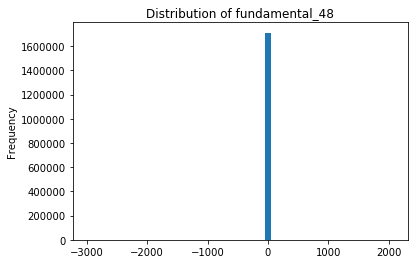

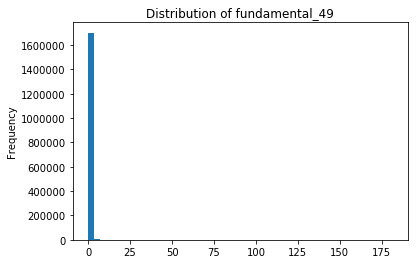

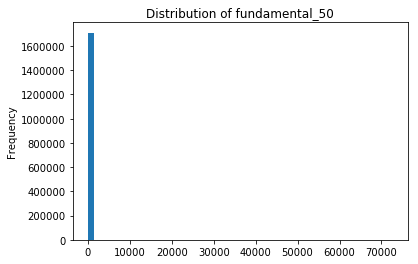

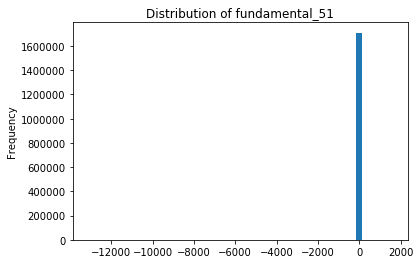

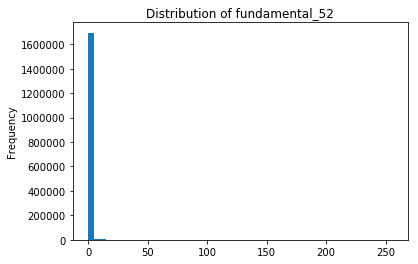

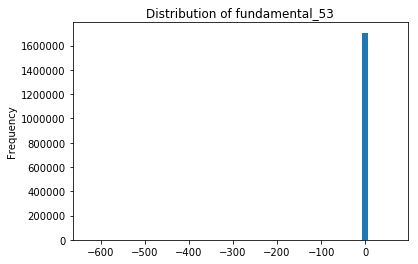

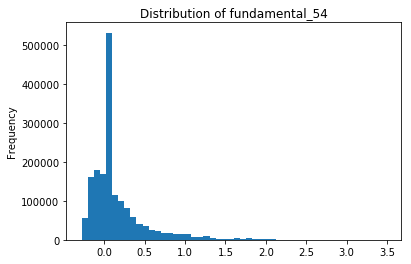

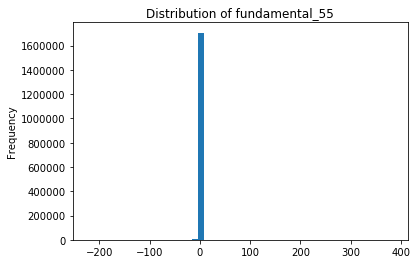

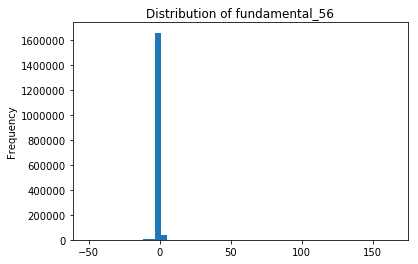

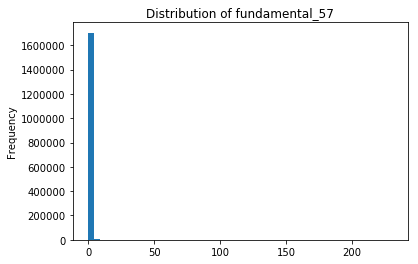

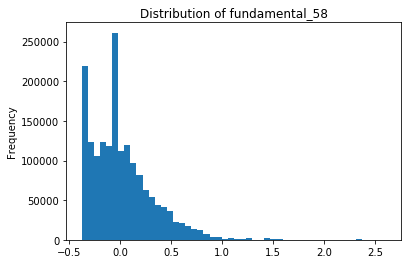

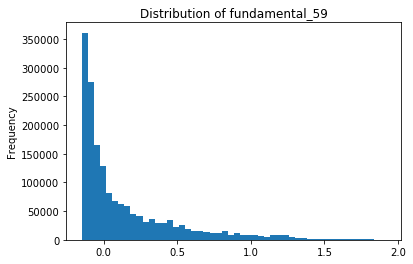

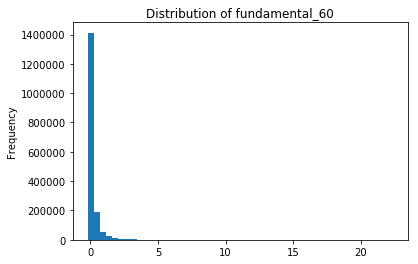

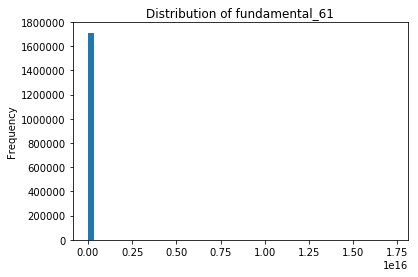

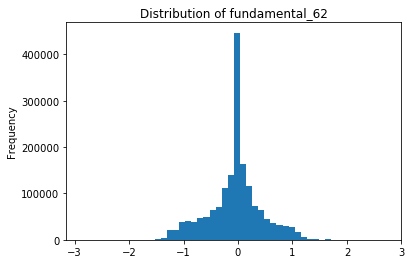

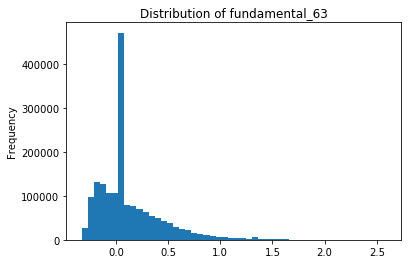

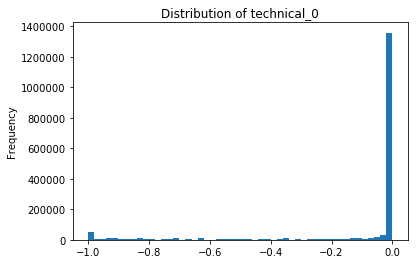

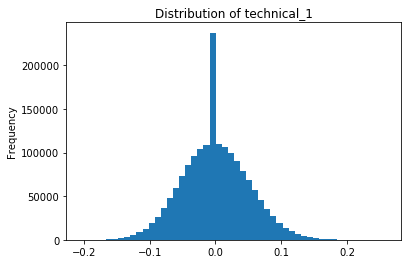

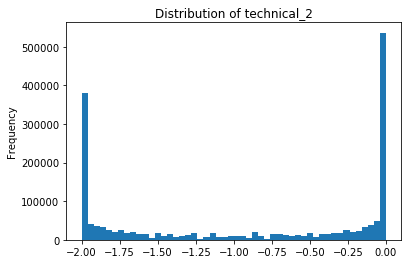

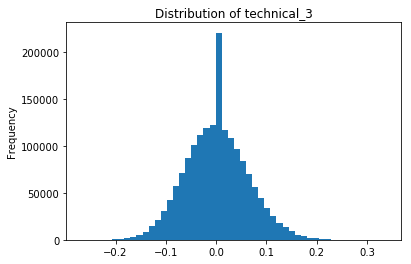

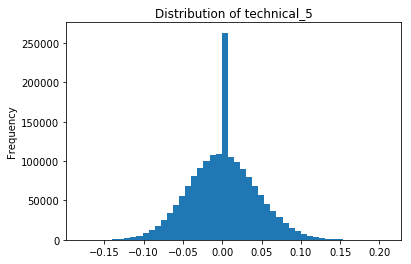

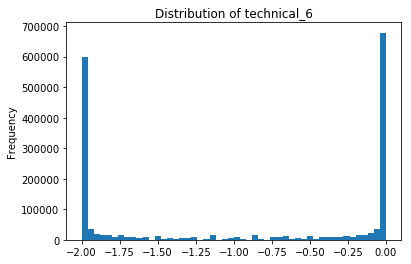

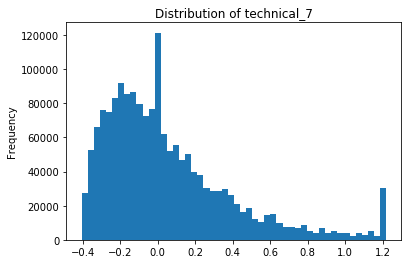

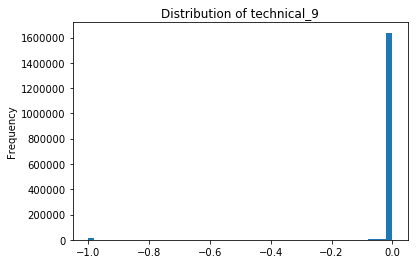

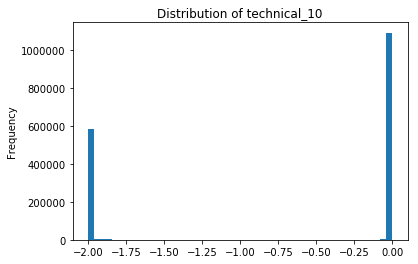

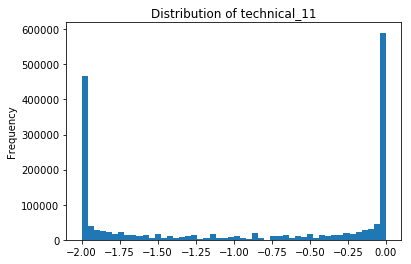

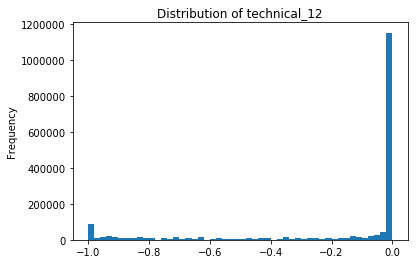

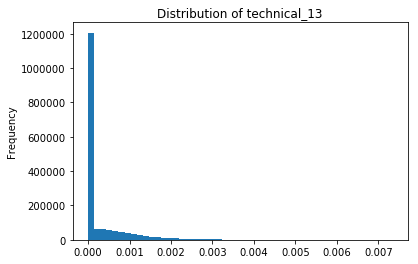

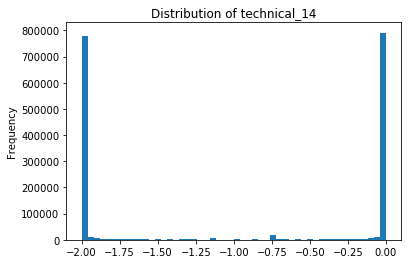

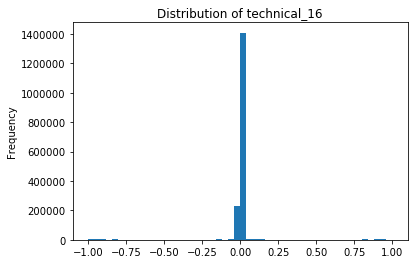

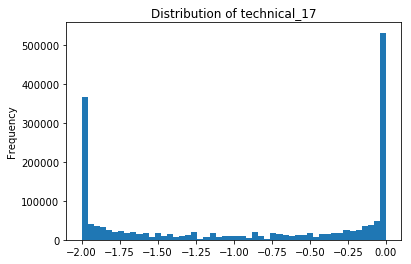

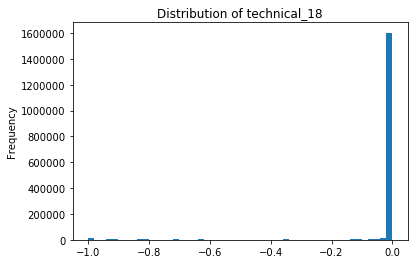

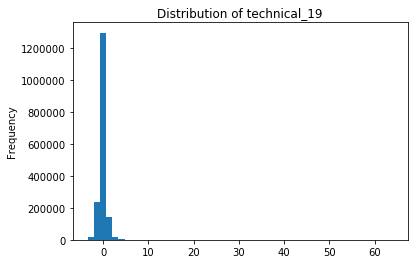

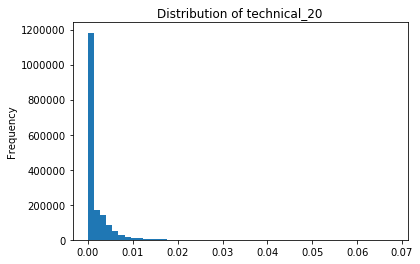

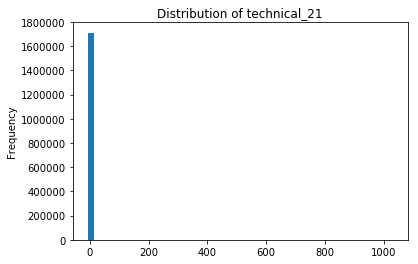

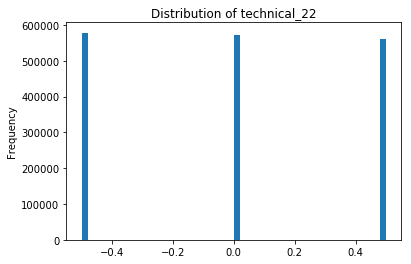

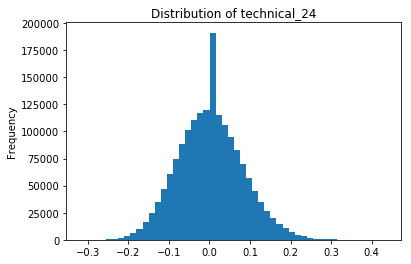

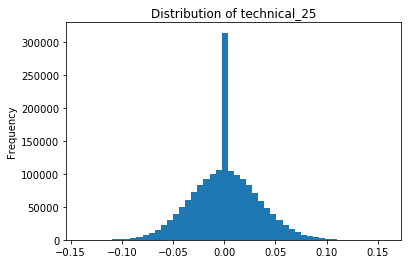

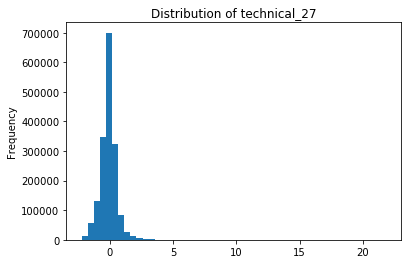

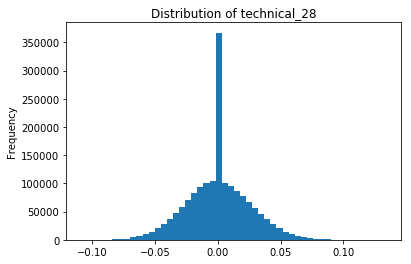

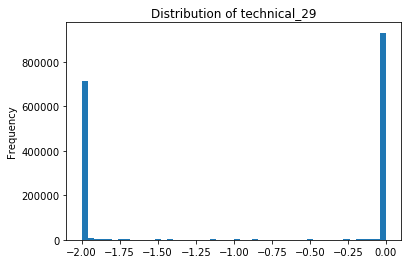

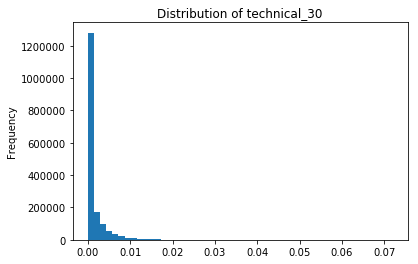

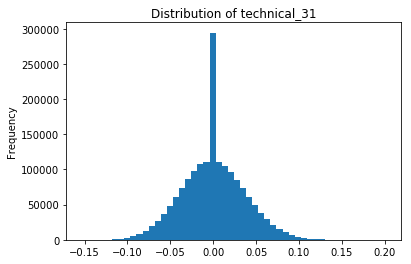

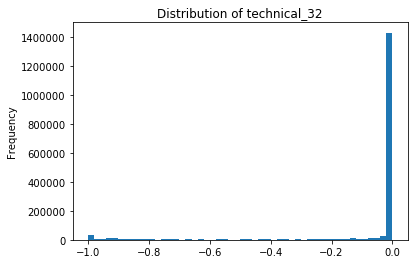

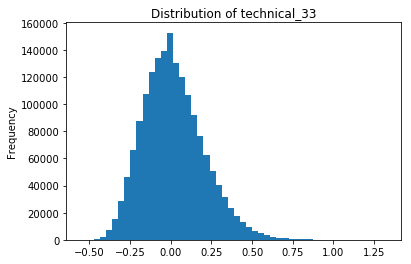

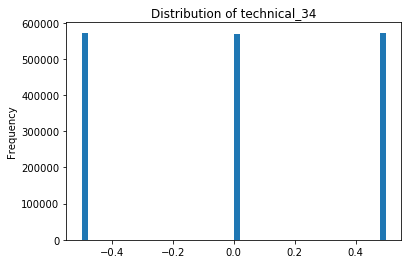

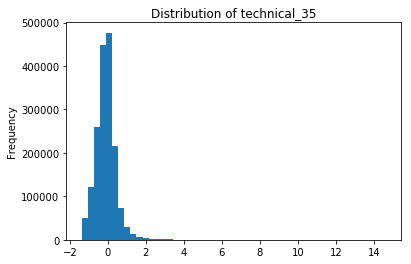

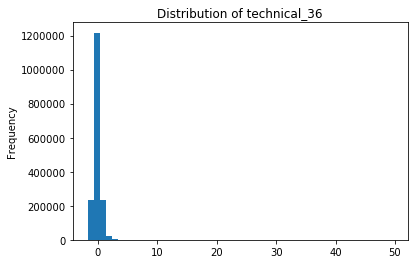

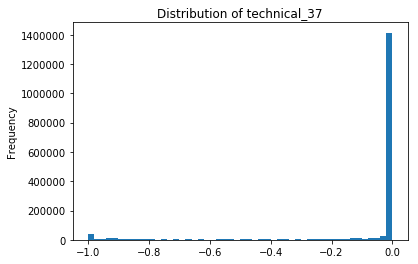

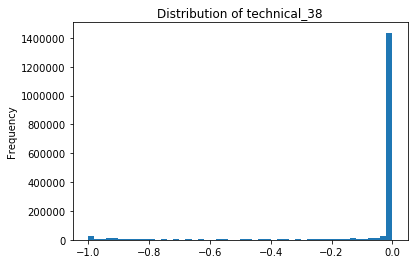

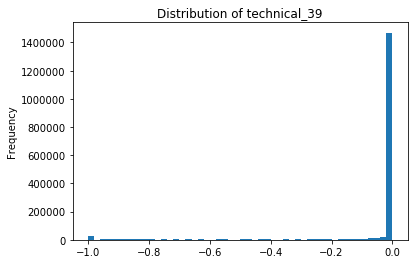

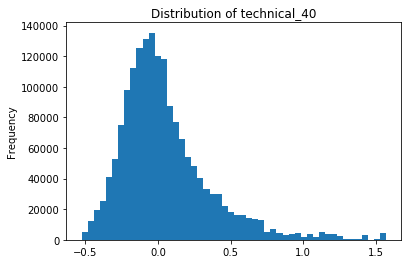

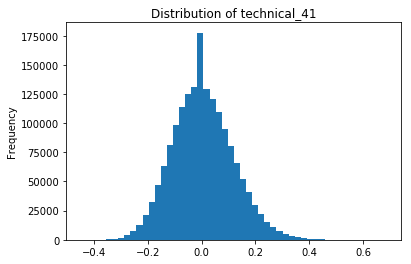

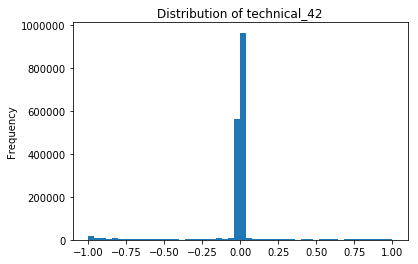

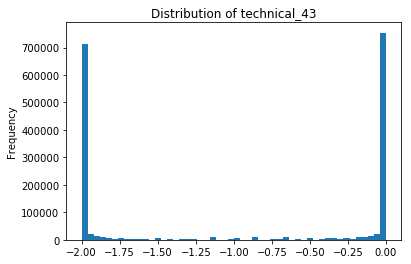

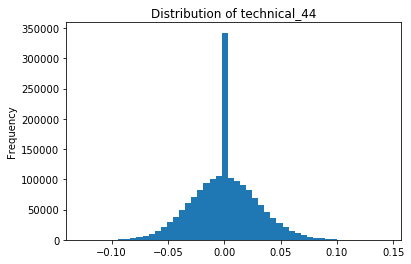

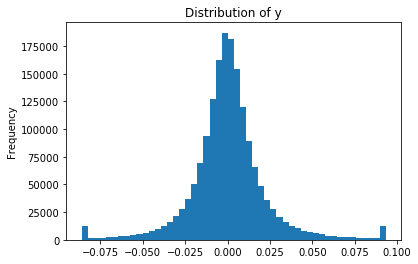

In [23]:
for clm in data.columns:
    plt.figure()
    data[clm].plot.hist(bins=50,title= ("Distribution of {}".format(clm)))

In [27]:
print (data.derived_0.median())

-0.0008368271519429982


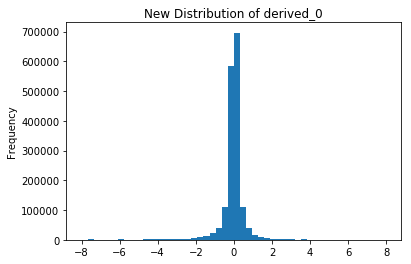

In [200]:
clm='derived_0'
_max=8
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

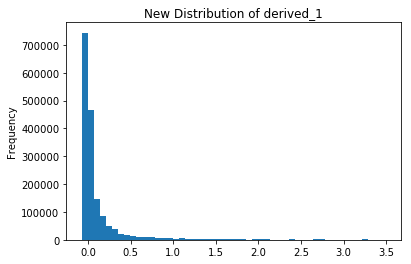

In [203]:
clm='derived_1'
_max=3.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

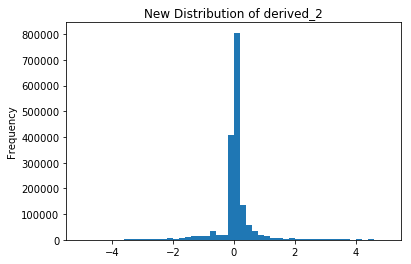

In [204]:
clm='derived_2'
_max=5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

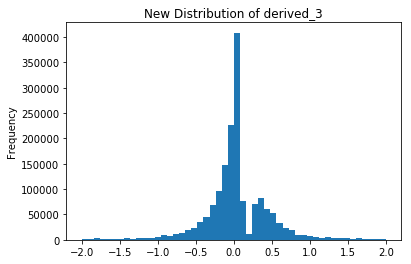

In [50]:
clm='derived_3'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

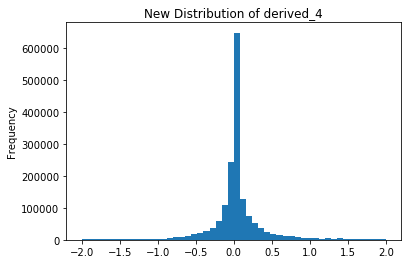

In [53]:
clm='derived_4'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

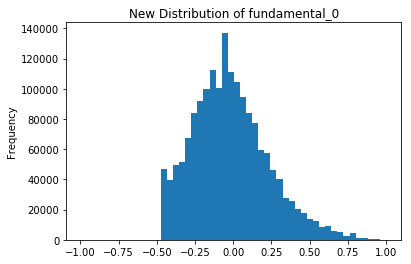

In [54]:
clm='fundamental_0'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

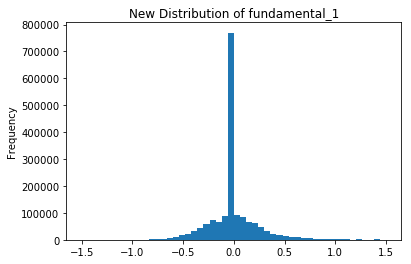

In [61]:
clm='fundamental_1'
_max=1.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

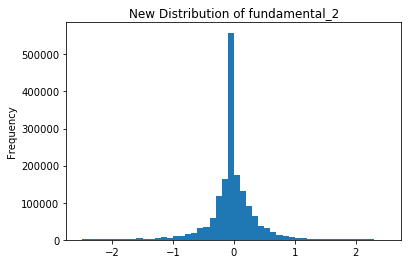

In [66]:
clm='fundamental_2'
_max=2.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

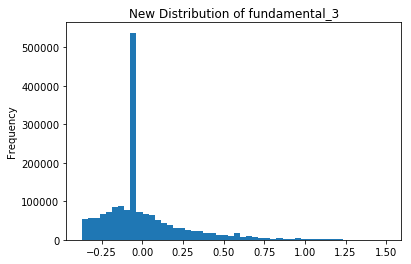

In [67]:
clm='fundamental_3'
_max=1.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

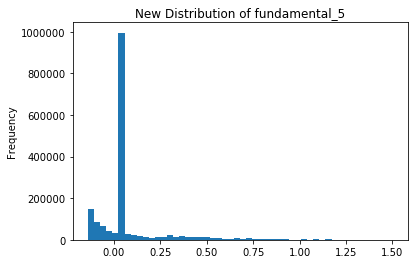

In [71]:
clm='fundamental_5'
_max=1.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

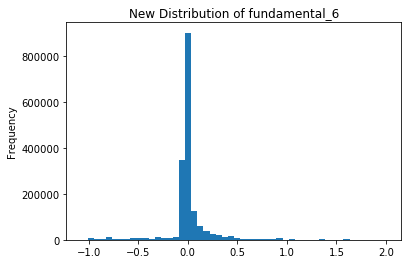

In [73]:
clm='fundamental_6'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

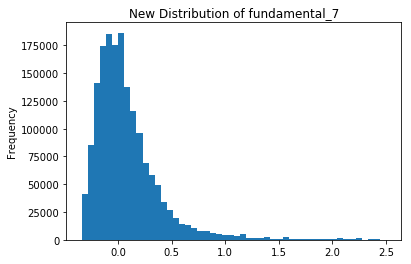

In [77]:
clm='fundamental_7'
_max=2.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

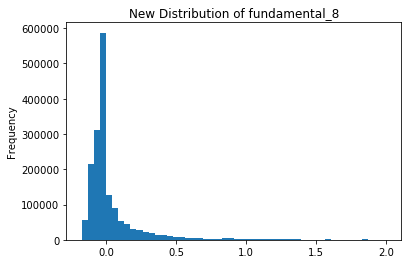

In [79]:
clm='fundamental_8'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

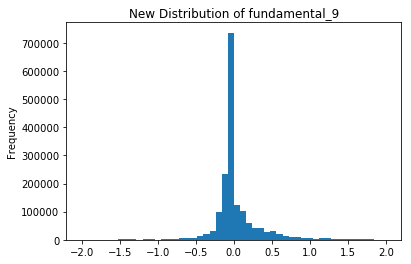

In [83]:
clm='fundamental_9'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

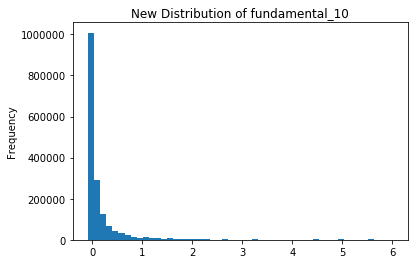

In [85]:
clm='fundamental_10'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

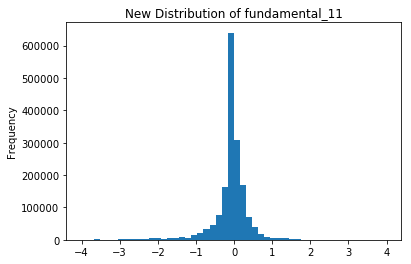

In [219]:
clm='fundamental_11'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

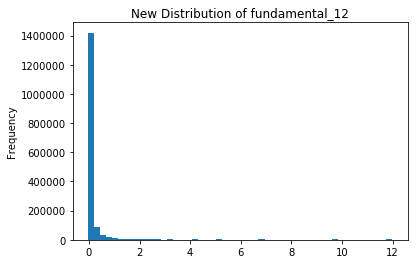

In [223]:
clm='fundamental_12'
_max=12
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

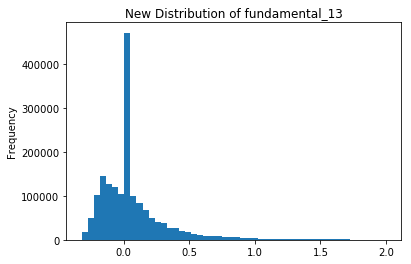

In [109]:
clm='fundamental_13'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

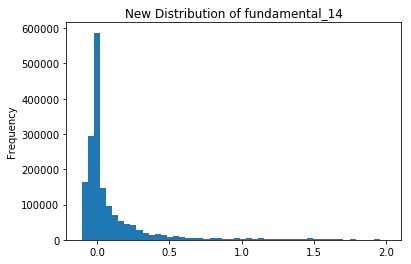

In [115]:
clm='fundamental_14'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

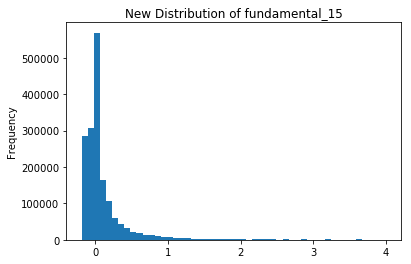

In [118]:
clm='fundamental_15'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

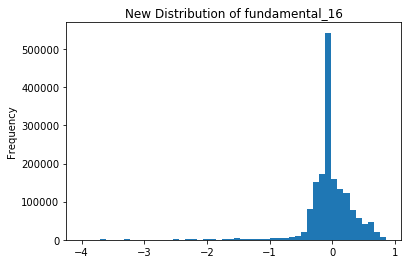

In [121]:
clm='fundamental_16'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

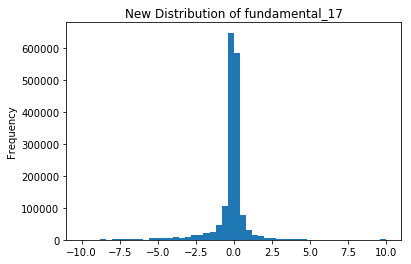

In [126]:
clm='fundamental_17'
_max=10
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

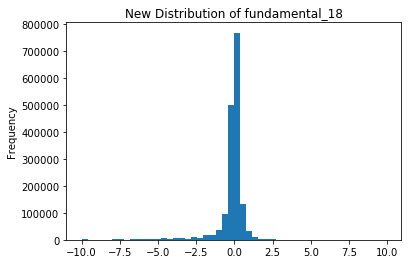

In [132]:
clm='fundamental_18'
_max=10
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

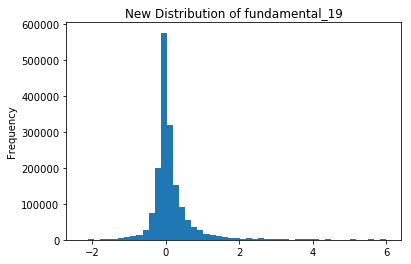

In [134]:
clm='fundamental_19'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

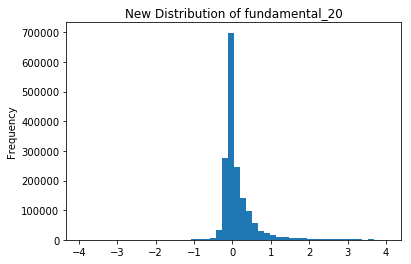

In [138]:
clm='fundamental_20'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

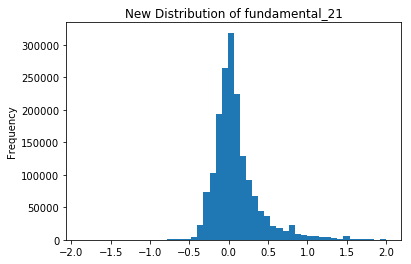

In [159]:
clm='fundamental_21'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

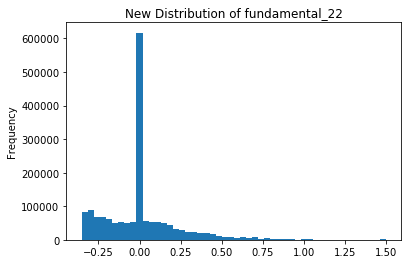

In [165]:
clm='fundamental_22'
_max=1.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

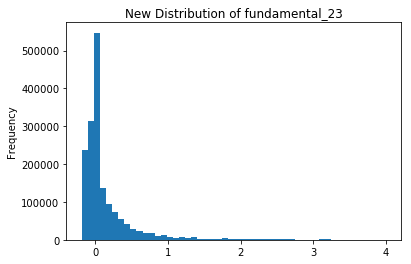

In [171]:
clm='fundamental_23'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

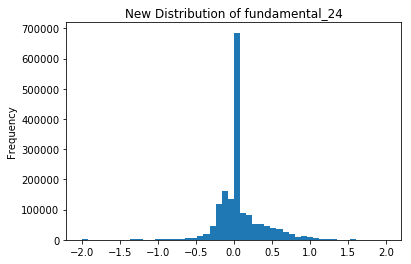

In [174]:
clm='fundamental_24'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

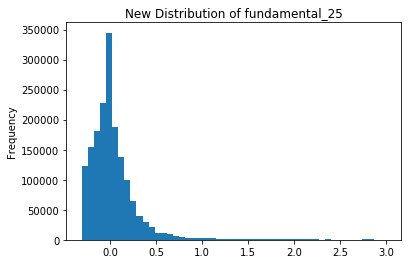

In [177]:
clm='fundamental_25'
_max=3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

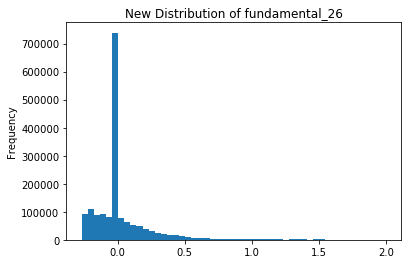

In [183]:
clm='fundamental_26'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

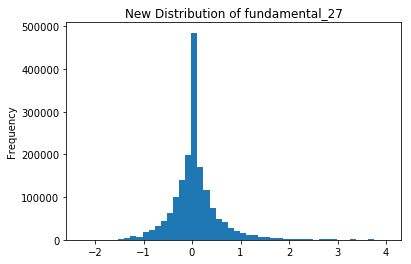

In [188]:
clm='fundamental_27'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

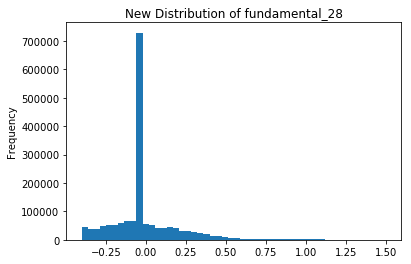

In [190]:
clm='fundamental_28'
_max=1.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

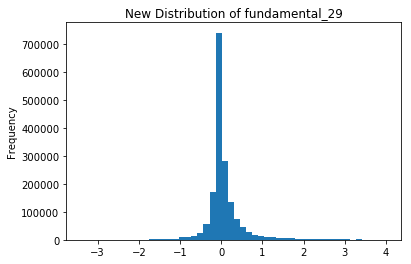

In [194]:
clm='fundamental_29'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

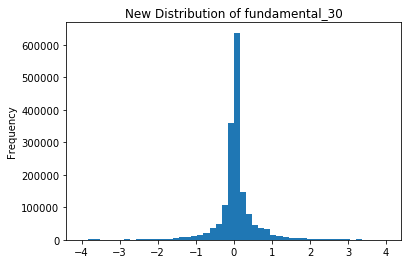

In [197]:
clm='fundamental_30'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

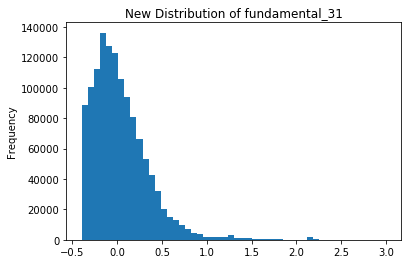

In [16]:
clm='fundamental_31'
_max=3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

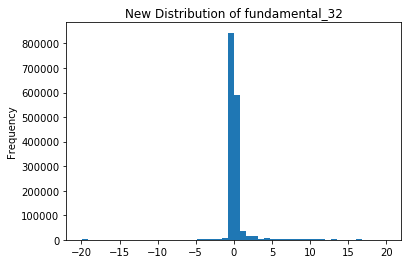

In [22]:
clm='fundamental_32'
_max=20
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

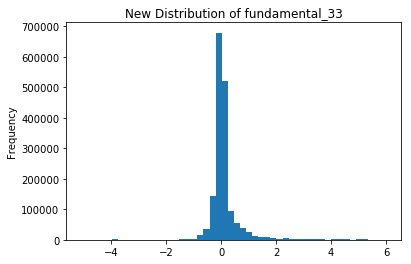

In [28]:
clm='fundamental_33'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

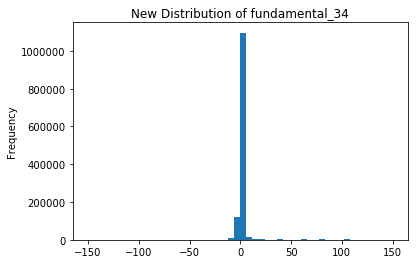

In [33]:
clm='fundamental_34'
_max=150
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

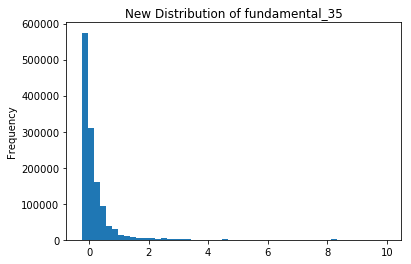

In [37]:
clm='fundamental_35'
_max=10
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

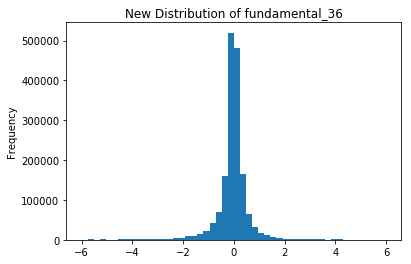

In [43]:
clm='fundamental_36'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

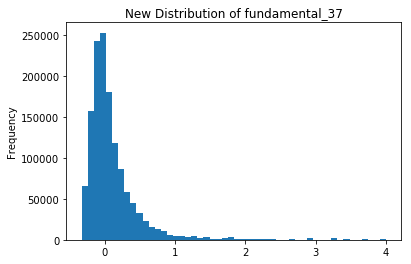

In [45]:
clm='fundamental_37'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

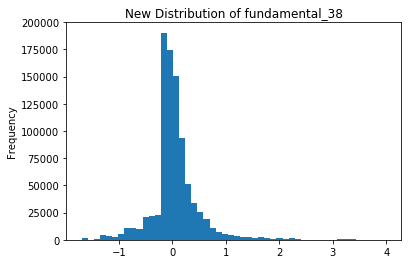

In [46]:
clm='fundamental_38'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

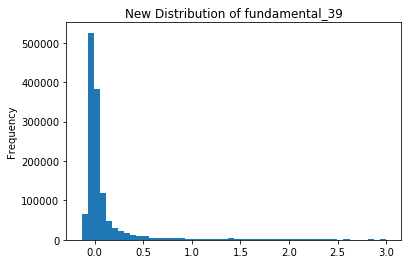

In [49]:
clm='fundamental_39'
_max=3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

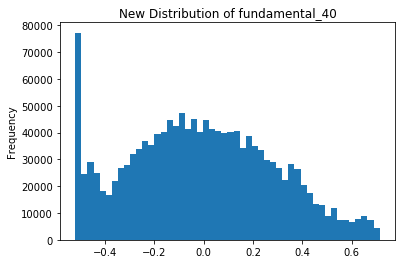

In [50]:
clm='fundamental_40'
_max=1 # all
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

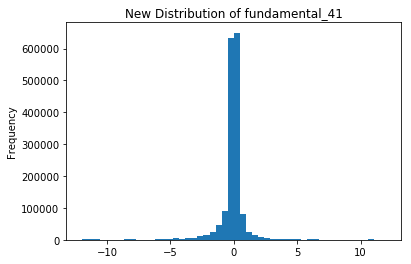

In [55]:
clm='fundamental_41'
_max=12
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

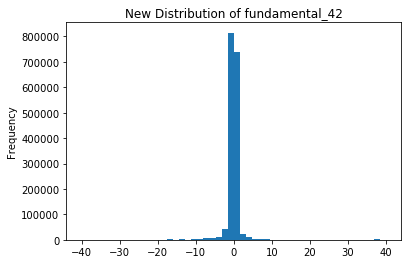

In [61]:
clm='fundamental_42'
_max=40
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

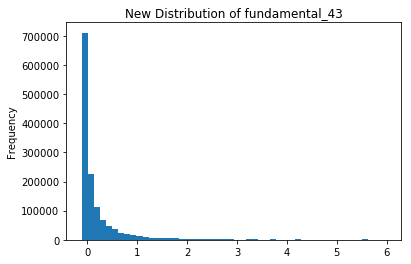

In [64]:
clm='fundamental_43'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

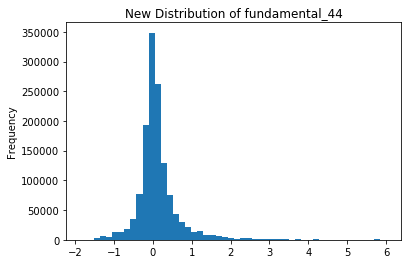

In [68]:
clm='fundamental_44'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

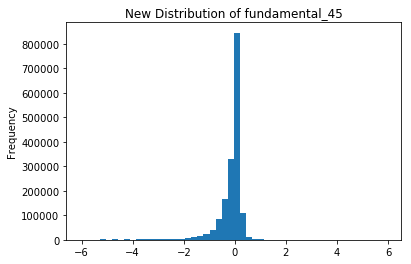

In [74]:
clm='fundamental_45'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

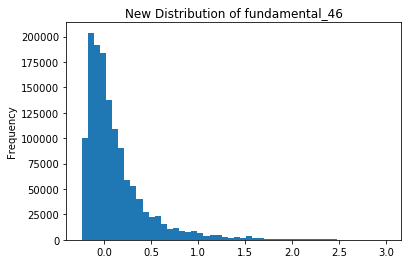

In [78]:
clm='fundamental_46'
_max=3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

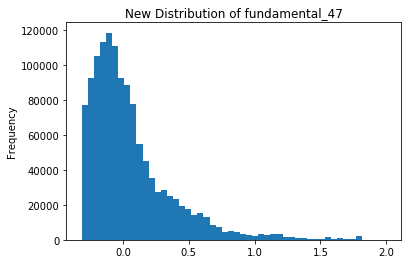

In [79]:
clm='fundamental_47'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

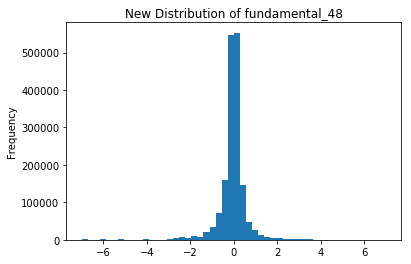

In [83]:
clm='fundamental_48'
_max=7
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

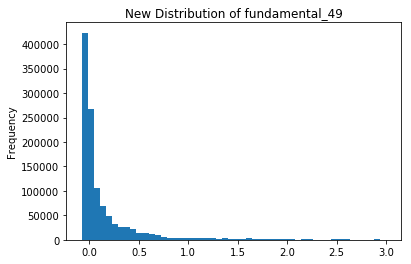

In [86]:
clm='fundamental_49'
_max=3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

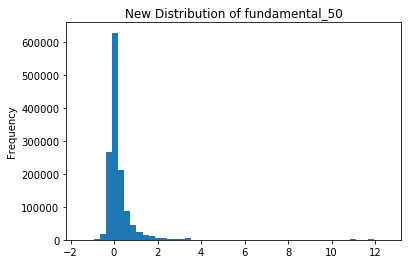

In [90]:
clm='fundamental_50'
_max=12.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

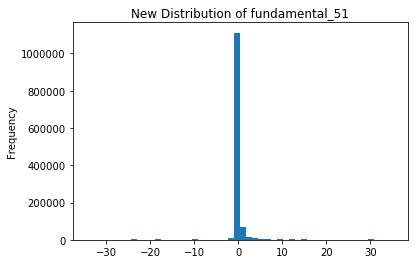

In [95]:
clm='fundamental_51'
_max=35
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

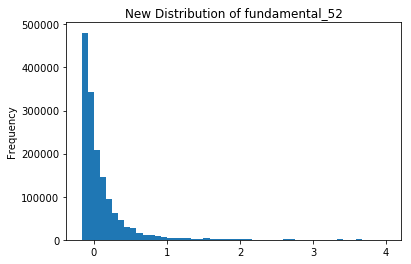

In [97]:
clm='fundamental_52'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

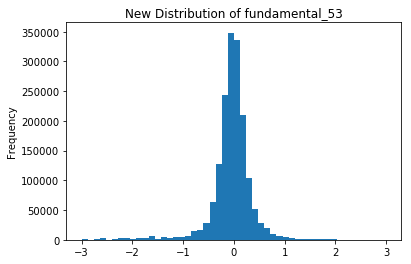

In [100]:
clm='fundamental_53'
_max=3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

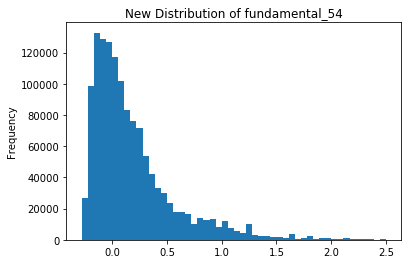

In [101]:
clm='fundamental_54'
_max=2.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

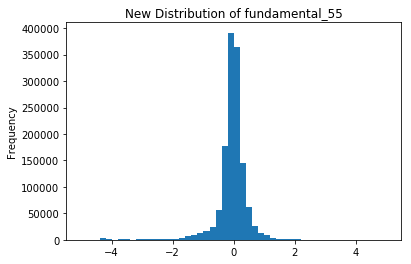

In [103]:
clm='fundamental_55'
_max=5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

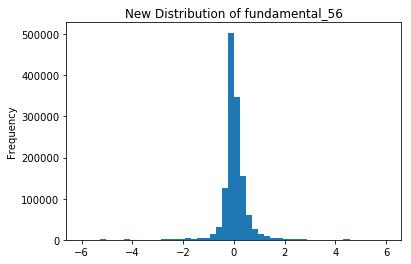

In [105]:
clm='fundamental_56'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

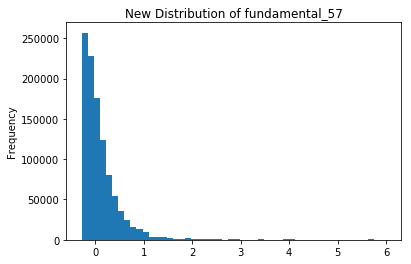

In [107]:
clm='fundamental_57'
_max=6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

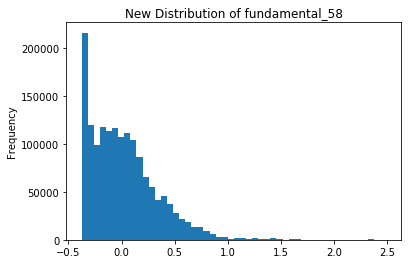

In [108]:
clm='fundamental_58'
_max=2.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

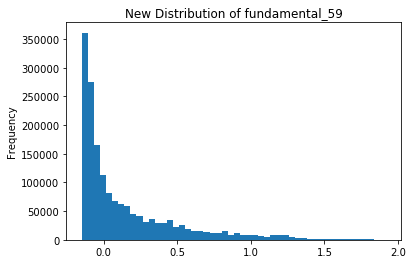

In [109]:
clm='fundamental_59'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

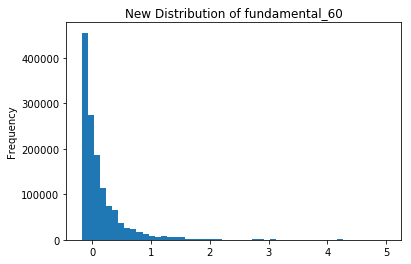

In [110]:
clm='fundamental_60'
_max=5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

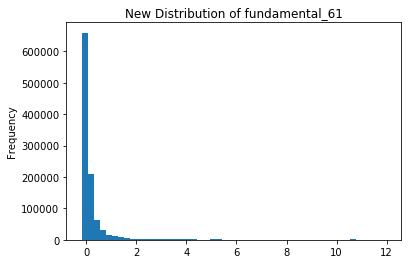

In [116]:
clm='fundamental_61'
_max=12
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

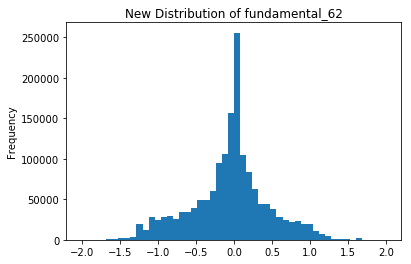

In [117]:
clm='fundamental_62'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

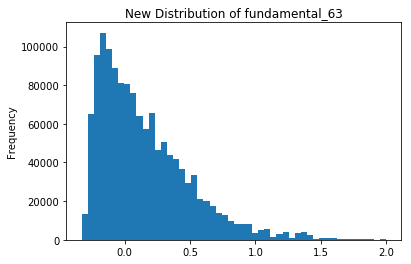

In [119]:
clm='fundamental_63'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

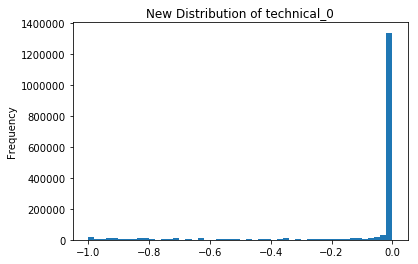

In [120]:
clm='technical_0'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

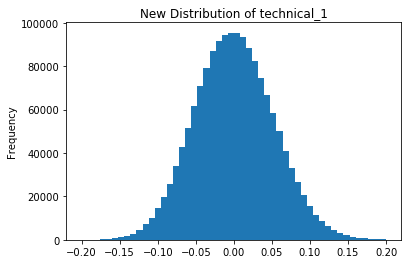

In [121]:
clm='technical_1'
_max=0.2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

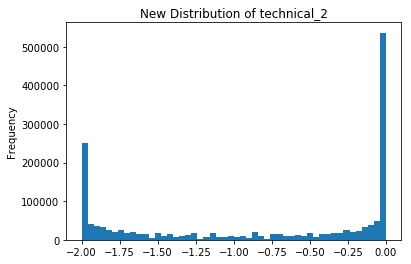

In [122]:
clm='technical_2'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

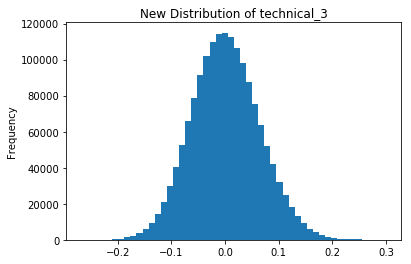

In [123]:
clm='technical_3'
_max=0.3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

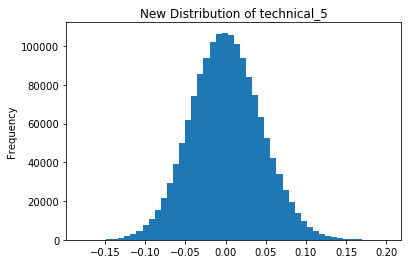

In [124]:
clm='technical_5'
_max=0.2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

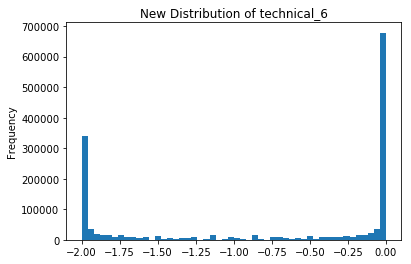

In [125]:
clm='technical_6'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

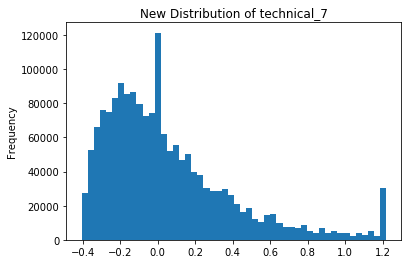

In [126]:
clm='technical_7'
_max=1.3 # all
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

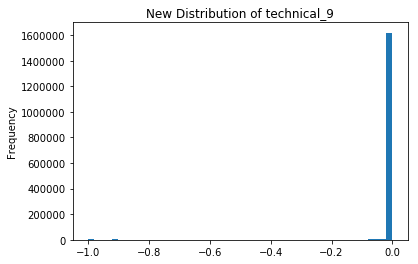

In [127]:
clm='technical_9'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

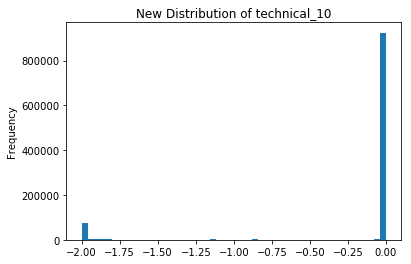

In [128]:
clm='technical_10'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

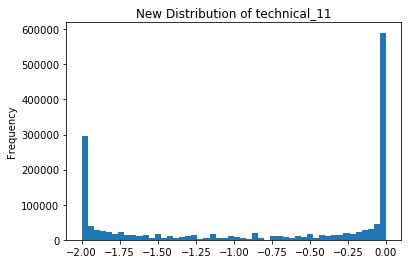

In [129]:
clm='technical_11'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

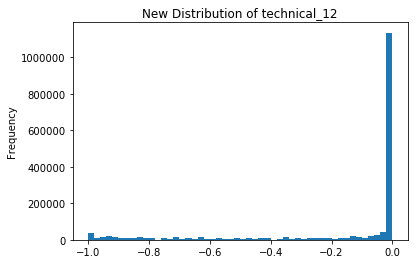

In [130]:
clm='technical_12'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

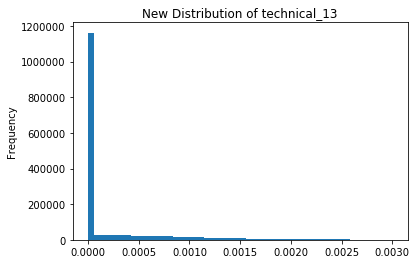

In [132]:
clm='technical_13'
_max=0.003
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

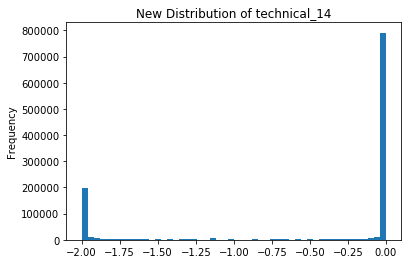

In [133]:
clm='technical_14'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

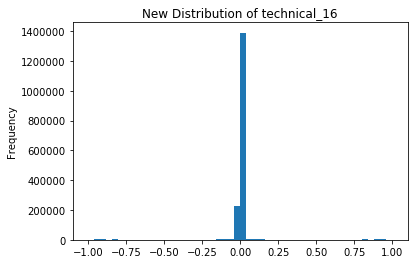

In [134]:
clm='technical_16'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

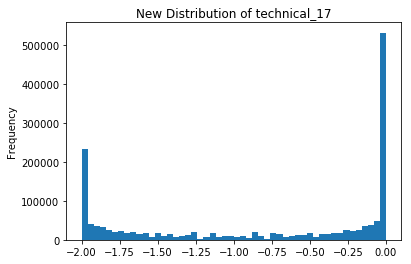

In [135]:
clm='technical_17'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

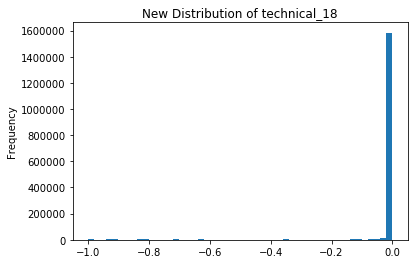

In [136]:
clm='technical_18'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

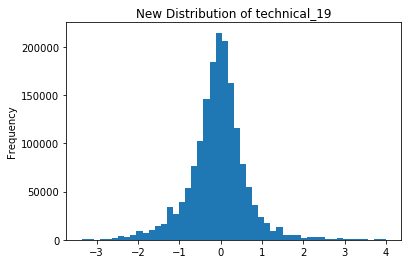

In [138]:
clm='technical_19'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

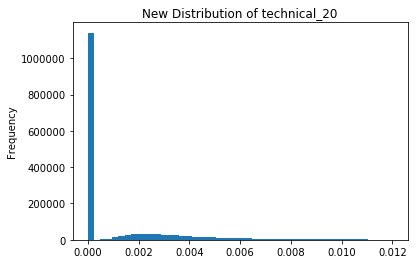

In [141]:
clm='technical_20'
_max=0.012
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

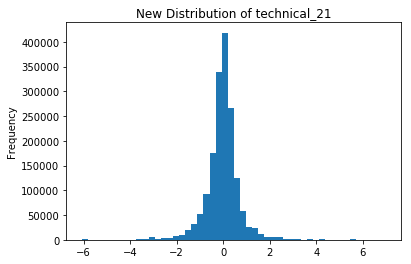

In [143]:
clm='technical_21'
_max=7
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

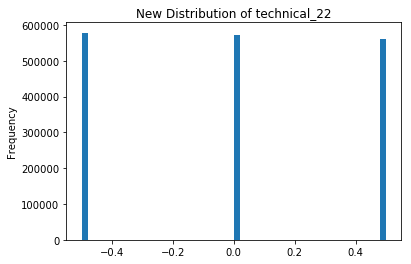

In [146]:
clm='technical_22'
_max=0.6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

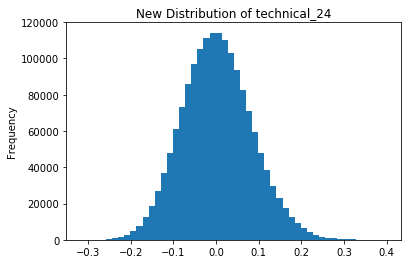

In [147]:
clm='technical_24'
_max=0.4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

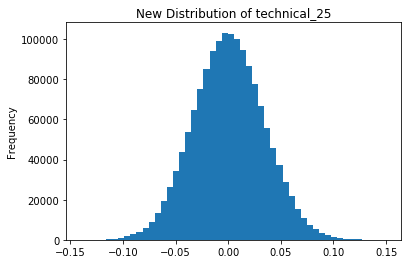

In [148]:
clm='technical_25'
_max=0.15
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

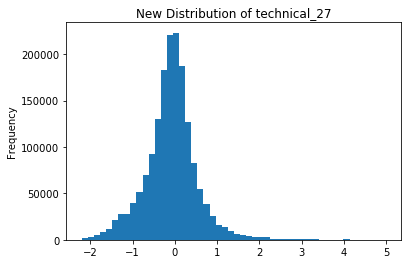

In [149]:
clm='technical_27'
_max=5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

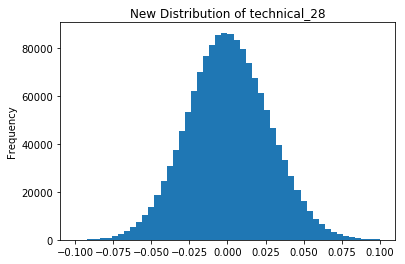

In [150]:
clm='technical_28'
_max=0.1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

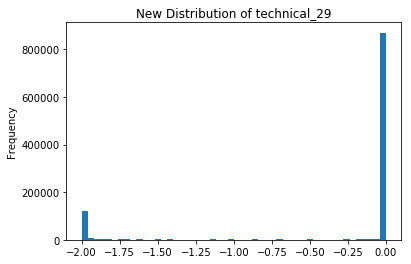

In [151]:
clm='technical_29'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

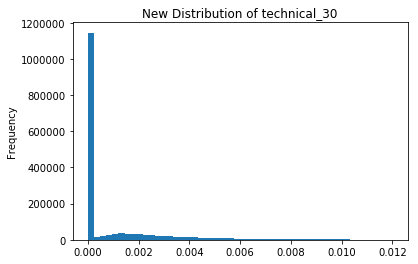

In [154]:
clm='technical_30'
_max=0.012
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

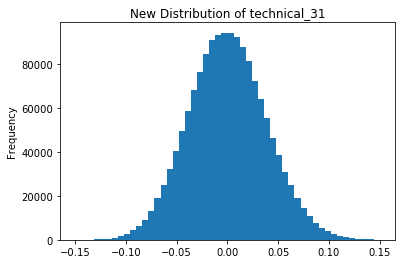

In [155]:
clm='technical_31'
_max=0.15
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

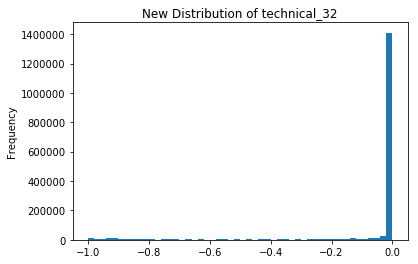

In [156]:
clm='technical_32'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

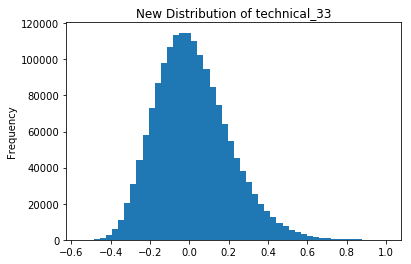

In [157]:
clm='technical_33'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

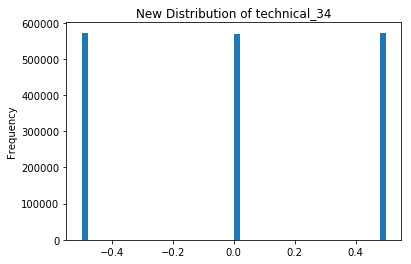

In [158]:
clm='technical_34'
_max=0.6
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

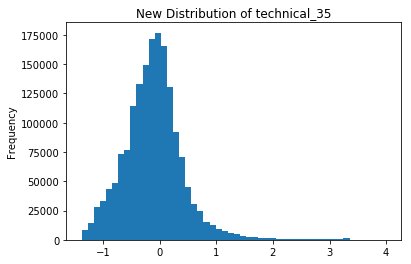

In [159]:
clm='technical_35'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

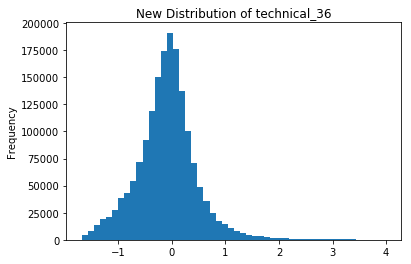

In [161]:
clm='technical_36'
_max=4
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

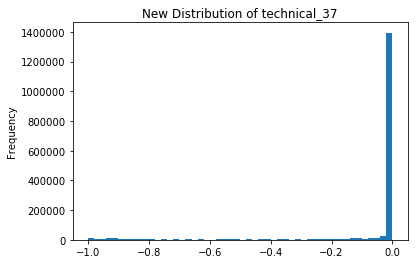

In [162]:
clm='technical_37'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

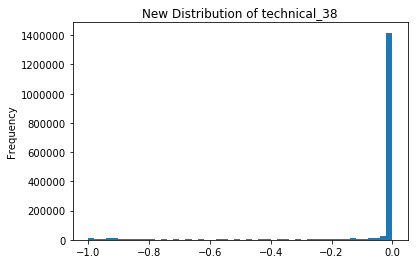

In [163]:
clm='technical_38'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

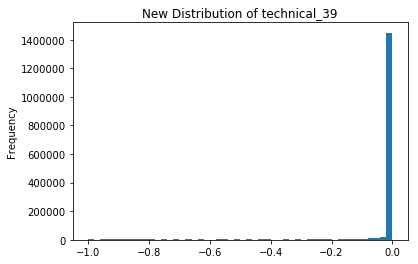

In [164]:
clm='technical_39'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

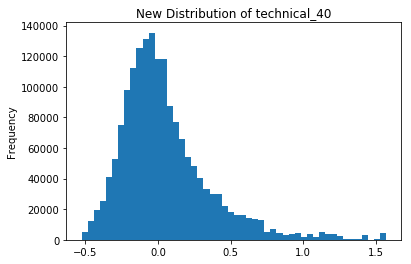

In [165]:
clm='technical_40'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

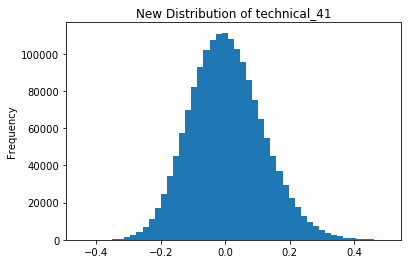

In [167]:
clm='technical_41'
_max=0.5
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

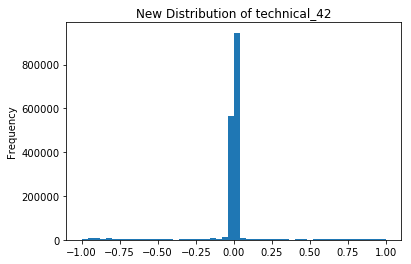

In [168]:
clm='technical_42'
_max=1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

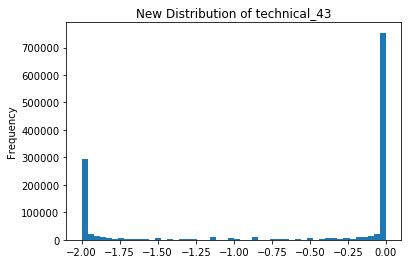

In [169]:
clm='technical_43'
_max=2
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

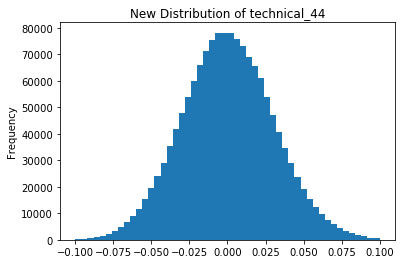

In [170]:
clm='technical_44'
_max=0.1
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

In [187]:
data_clips={'derived_0':8,'derived_1':3.5,'derived_2':10,'derived_3':10,'derived_4':2, 'fundamental_0':1, 'fundamental_1':1.5,
           'fundamental_2':2.5, 'fundamental_3':1.5, 'fundamental_5':1.5, 'fundamental_6':2,'fundamental_7':2.5,
            'fundamental_8':2, 'fundamental_9':2, 'fundamental_10':6, 'fundamental_11':4, 'fundamental_12':20,
           'fundamental_13':2, 'fundamental_14':2, 'fundamental_15':4, 'fundamental_16':4, 'fundamental_17':10, 
            'fundamental_18':10, 'fundamental_19':6, 'fundamental_20':4, 'fundamental_21':2, 'fundamental_22':1.5,
            'fundamental_23':4,'fundamental_24':2, 'fundamental_25':3, 'fundamental_26':2, 'fundamental_27':4,
           'fundamental_28':1.5, 'fundamental_29':4, 'fundamental_30':4, 'fundamental_31':3, 'fundamental_32':20,
            'fundamental_33':6, 'fundamental_34':150, 'fundamental_35':10, 'fundamental_36':6, 'fundamental_37':4,
           'fundamental_38':4, 'fundamental_39':3, 'fundamental_40':10, 'fundamental_41':12, 'fundamental_42':40,
           'fundamental_43':6, 'fundamental_44':6, 'fundamental_45':6, 'fundamental_46':3, 'fundamental_47':2,
           'fundamental_48':7, 'fundamental_49':3, 'fundamental_50':12, 'fundamental_51':35, 'fundamental_52':4,
           'fundamental_53':3, 'fundamental_54':2.5, 'fundamental_55':5, 'fundamental_56':6, 'fundamental_57':6,
           'fundamental_58':2.5, 'fundamental_59':2, 'fundamental_60':5, 'fundamental_61':12, 'fundamental_62':2,
           'fundamental_63':2, 'technical_0':1, 'technical_1':0.2, 'technical_2':2, 'technical_3':0.3, 'technical_5':0.2,
           'technical_6':2, 'technical_7':1.3, 'technical_9':1, 'technical_10':3, 'technical_11':2, 'technical_12':1,
           'technical_13':0.003, 'technical_14':3, 'technical_16':1, 'technical_17':2, 'technical_18':1,
           'technical_19':4, 'technical_20':0.012, 'technical_21':7, 'technical_22':0.6, 'technical_24':0.4,
           'technical_25':0.15, 'technical_27':5, 'technical_28':0.1, 'technical_29':2, 'technical_30':0.012,
           'technical_31':0.15, 'technical_32':1, 'technical_33':1, 'technical_34':0.6, 'technical_35':4,
           'technical_36':4, 'technical_37':1, 'technical_38':1, 'technical_39':1, 'technical_40':2,
           'technical_41':0.5, 'technical_42':1, 'technical_43':2, 'technical_44':0.1}

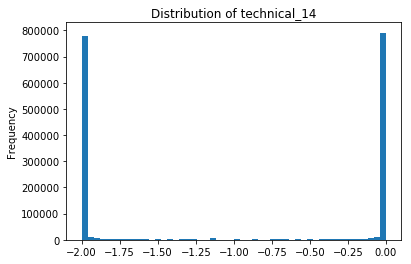

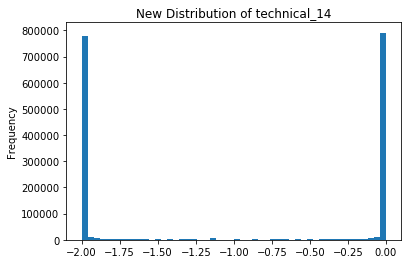

In [186]:
clm='technical_14'
data[clm].plot.hist(bins=50,title= ("Distribution of {}".format(clm)))
plt.figure()
_max=3
_min=-_max
data[(data[clm]>_min)&(data[clm]<_max)][clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

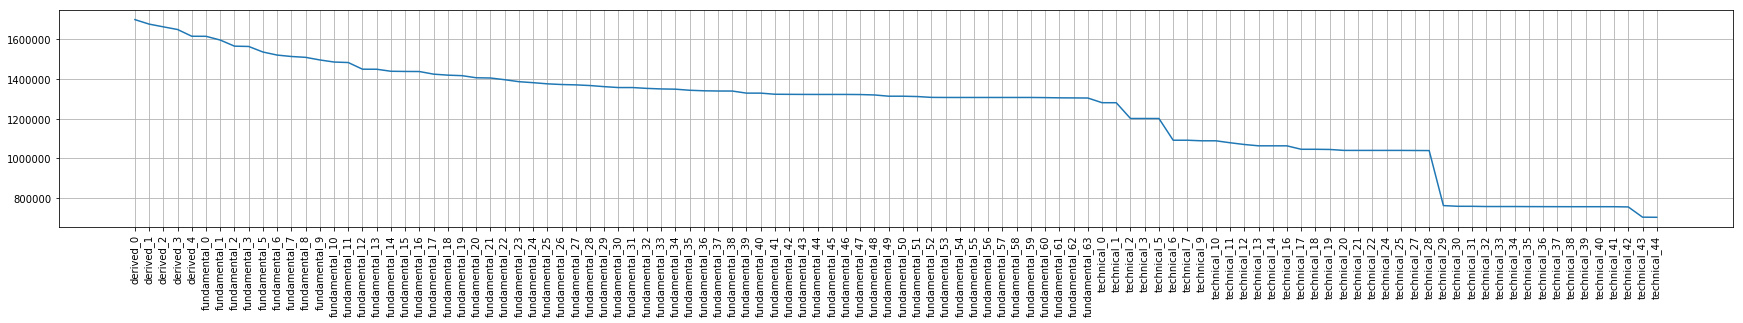

In [188]:
selected=data.id>-10000
features=[]
data_size=[]
for feature in data_clips:
    selected = selected & (((data[feature]<data_clips[feature]) & (data[feature]>-data_clips[feature])) | 
                           (data[feature].isnull()))
    features.append(feature)
    data_size.append(data[selected].shape[0])
    #print (feature, ': ', data[selected].shape)

x=range(len(features))
plt.figure(figsize=(30,4))
plt.xticks(x, features, rotation='vertical', fontsize=10)
plt.plot(x, data_size)
plt.grid()
plt.show()

In [129]:
data[selected].describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06,1.152809e+06
mean,1.090862e+03,9.287142e+02,-8.607214e-03,2.049135e-02,5.073601e-02,1.401994e-02,2.999769e-02,-3.036926e-02,6.290328e-03,3.463768e-02,2.068140e-02,5.347972e-02,1.601309e-02,6.528568e-02,3.423812e-02,1.143514e-02,1.186682e-01,8.764070e-03,7.061724e-02,6.849287e-02,8.638696e-02,8.393297e-02,8.994726e-03,-7.298264e-02,-2.486626e-02,2.875338e-01,2.034979e-01,4.944867e-02,2.368324e-02,5.469634e-01,4.387595e-02,1.086661e-01,4.926807e-02,3.720133e+00,2.679830e-02,1.173735e-01,3.760034e-02,4.124296e-02,9.541455e-02,1.790031e-01,2.615260e-01,1.701099e-01,1.166794e-03,8.269823e-02,3.371282e-02,2.105683e-01,1.675124e-02,-3.533404e+03,-3.973032e+03,8.394402e-02,2.506728e-01,-2.215639e-01,9.371571e-02,3.356110e-02,4.671017e-02,1.941744e-01,3.324183e-01,3.802800e-01,1.564285e-01,1.564175e-02,1.012224e-01,3.076262e-02,6.254807e-02,7.360839e-02,2.611851e-02,8.031432e-02,4.529146e-02,1.506535e-01,-3.832064e-02,9.841274e-02,-1.085287e-01,5.974740e-04,-8.868697e-01,1.636770e-03,6.149407e-04,-9.277788e-01,-2.397718e-02,-2.320375e-02,-6.37

In [9]:
_mean = data.median(axis=0)
data.fillna(_mean, inplace=True);

In [10]:
from scipy import stats
data_cleaned=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [12]:
data_cleaned.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,955663.000000,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,9.556630e+05,9.556630e+05,955663.000000,9.556630e+05,955663.000000,9.556630e+05,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,9.556630e+05,955663.000000,955663.000000,955663.000000,955663.000000,9.556630e+05,9.556630e+05,9.556630e+05,955663.000000,955663.000000,9.556630e+05,9.556630e+05,955663.000000,955663.000000
mean,1090.706455,911.713950,0.061918,1.411069e+09,0.020188,0.038929,0.015309,-0.032878,-1.148310e+06,-0.008864,-0.005084,0.062651,0.026412,0.074844,0.032120,0.021926,0.134037,-0.032533,4.293120,0.075186,0.082380,0.103716,-0.005214,2.503154e+12,-0.064687,0.126575,0.172997,0.039207,0.025087,0.140205,0.053705,0.047457,0.048059,0.078099,0.008123,0.100397,0.039391,0.015889,2.725983,4.479203,0.274598,0.082754,-0.006404,0.070726,0.006721,0.110528,-0.009572,-0.144615,-0.166250,0.065085,0.062114,-0.192798,0.087881,0.010176,0.023821,0.114945,0.117730,0.359293,0.106479,0.011437,0.090260,0.007595,0.039371,0.069844,-0.005933,0.080117,0.046480,1.893829e+09,-0.042991,0.098357,-5.298001e-02,-0.000219,-1.015709,0.000416,0.000260,-0.988523,-0.027790,-2.903270e-03,-6.509053e-01,-1.007247,-1.219986e-01,0.000256,-9.187965e-01,-0.000410,-1.000985,-5.660901e-03,-0.086046,0.001045,-0.096112,-0.090644,0.001614,0.000409,-0.071755,0.000336,-7.912834e-01,0.

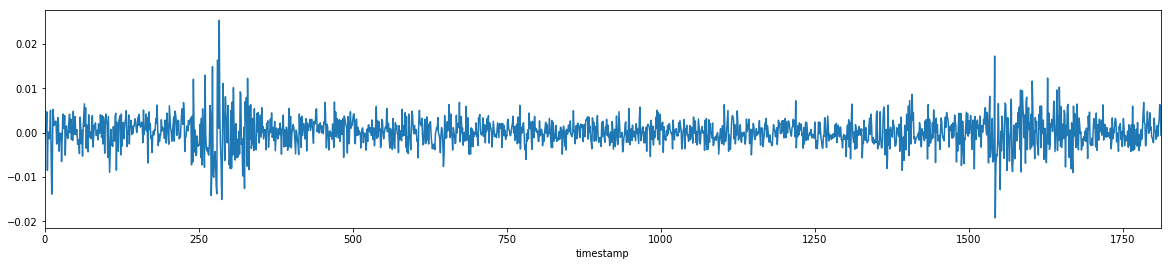

In [105]:
data_cleaned.groupby(['timestamp']).mean().y.plot(figsize=(20, 4));

In [ ]:
data.y.plot.hist(bins=50,title= "Distribution of asset returns (y)");

In [ ]:
data[data.id==10].y.plot(figsize=(20, 4));

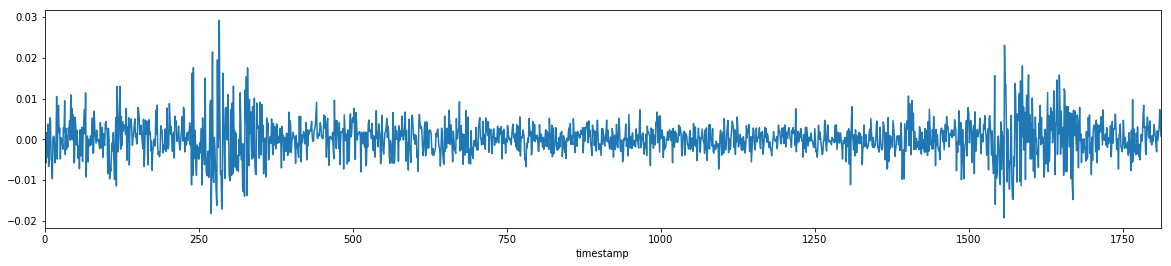

In [106]:
data.groupby(['timestamp']).mean().y.plot(figsize=(20, 4));

In [ ]:
data.technical_37.plot.hist(bins=50,title= "Distribution of asset returns (y)");

In [ ]:
Corr_=[]
for col in data.columns.values:
    Corr_.append([col, abs(data.y.corr(data[col]))])

In [ ]:
Corr_df = pd.DataFrame(Corr_,columns=['column', 'correlation'])
Corr_df.sort_values('correlation',ascending=False).head(10)

In [ ]:
_mean = data.mean(axis=0)
data.fillna(_mean, inplace=True);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=8, shuffle= False)
y_train = train.y
X_train = train.drop('y', axis=1)
y_test = test.y
X_test = test.drop('y', axis=1)

In [ ]:
n=len(X_train.index)
select_ind = np.random.choice(len(X_train.index), size=n, replace=False)
names = X_train.columns.values

In [ ]:
KBest_select = SelectKBest(score_func =f_regression, k=5).fit(X_train.loc[select_ind], y_train.loc[select_ind])

In [ ]:
kbest_scores=pd.DataFrame({'feature': names, 'score': KBest_select.scores_}).sort_values('score',ascending=False)
kbest_scores.head(10)

In [ ]:
Extrees_select = ExtraTreesRegressor(n_estimators=10,random_state=0, n_jobs=8).fit(X_train.loc[select_ind], y_train.loc[select_ind])

In [ ]:
Extrees_scores=pd.DataFrame({'feature': names, 'score': Extrees_select.feature_importances_}).sort_values('score',ascending=False)
Extrees_scores.head(10)